# Clean BX-User.csv
## Set up Enviroment

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from fuzzywuzzy import process, fuzz

from sklearn.preprocessing import OrdinalEncoder

In [2]:
path = os.path.join(os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/data/")

In [3]:
os.listdir(path + 'raw')

['BX-NewBooksUsers.csv',
 'BX-Books.csv',
 'BX-Ratings.csv',
 'BX-Users.csv',
 'BX-NewBooksRatings.csv',
 'BX-NewBooks.csv']

## Data Information

In [4]:
users = pd.read_csv(path + "raw/BX-Users.csv")
users.columns

Index(['User-ID', 'User-City', 'User-State', 'User-Country', 'User-Age'], dtype='object')

In [5]:
users.shape

(48299, 5)

In [6]:
users.count()

User-ID         48299
User-City       48238
User-State      48299
User-Country    47630
User-Age        29347
dtype: int64

In [7]:
users.dtypes

User-ID          int64
User-City       object
User-State      object
User-Country    object
User-Age        object
dtype: object

In [8]:
users.head()

,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,"canada""",NaN
1,9,germantown,tennessee,"usa""",NaN
2,16,albuquerque,new mexico,"usa""",NaN
3,17,chesapeake,virginia,"usa""",NaN
4,19,weston,,NaN,"14"""


## Clean Country Names
- Strip apostrophe and spaces
- Clean values supposed to be NaN
- Fix Abbreviated names: Dictionary of abbreviations

Fill in empty states/countries via data base from: 
- https://simplemaps.com/data/us-cities
- https://simplemaps.com/data/world-cities

In [9]:
columns = ['User-Country', 'User-State', 'User-City','User-Age']
for column in columns:
    users[column] = users[column].apply(lambda x: x.strip().strip('"') if pd.notnull(x) and isinstance(x, str) else x)
users.head()

,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,canada,NaN
1,9,germantown,tennessee,usa,NaN
2,16,albuquerque,new mexico,usa,NaN
3,17,chesapeake,virginia,usa,NaN
4,19,weston,,NaN,14


In [10]:
pattern_1 = r'[xX]{2,6}'  # Matches 2 to 6 occurrences of "X"
pattern_2 = r'\b(n/a)\b' # Matches n/a 
pattern_3 = r'^\s$|^$' #matches whitespace entries
pattern_4 = r'-' # matches hyphen


# Replace matching values with np.nan
for column in ['User-Country', 'User-State', 'User-City']:
    # Replace matching values with np.nan using the respective pattern
    users[column] = users[column].replace(pattern_1, np.nan, regex=True)
    users[column] = users[column].replace(pattern_2, np.nan, regex =True)
    users[column] = users[column].replace(pattern_3, np.nan, regex=True)
    users[column] = users[column].replace(pattern_4, np.nan, regex=True)

  
# Fill remaining NaN values with np.nan
users.fillna(np.nan, inplace=True)

In [11]:
abbreviation_dict = {
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#States.
    "AK": "Alaska",
    "AL": "Alabama",
    "AR": "Arkansas",
    "AZ": "Arizona",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "IA": "Iowa",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "MA": "Massachusetts",
    "MD": "Maryland",
    "ME": "Maine",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MO": "Missouri",
    "MS": "Mississippi",
    "MT": "Montana",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "NE": "Nebraska",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NV": "Nevada",
    "NY": "New York",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VA": "Virginia",
    "VT": "Vermont",
    "WA": "Washington",
    "WI": "Wisconsin",
    "WV": "West Virginia",
    "WY": "Wyoming",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Federal_district.
    "DC": "District of Columbia",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Inhabited_territories.
    "AS": "American Samoa",
    "GU": "Guam GU",
    "MP": "Northern Mariana Islands",
    "PR": "Puerto Rico PR",
    "VI": "U.S. Virgin Islands",
    'sg': 'singapore',
    'jax': "Jacksonville",
    'nyc' : "New York City",
    'ny' : 'New York',
    'la':'Las Vegas',
    'wi': "Wisconsin",
    'sj' : 'San Jose',
    'pdx':'portland',
    'atl' : 'atlanta',
    'rtr' : 'Remedios T. Romualdez',
    'phx' : 'phoenix',
    'hyd':'Hyderabad',
    'bcn': 'Barcelona',
    'ala':'alabama',
    'rr':'round rock', 
    'dc': "washington d.c",
    'apo': 'apopka',
    'kdh':'kill devil hills',
    'yvr': 'vancouver',
    'okc' : 'oklahoma city',
    'abq' :'albuquerque',
    'pve': 'palos verdes estates' ,
    'dfb' :'deerfield beach',
    'pj' : 'petaling Jaya',
    'van' : 'vancouver',
    'rsm' : 'Rancho Santa Margarita',
    'rvc' : " Rockville centre",
    'srq' : 'Sarasota',
    'br' : 'baton rouge',
    'kl' : "Kuala Lumpur",
    'kc' :'kansas city',
    'abc' : "alphabet city",
    'sf' : "San Francisco",
    'slc' : 'salt lake city',
    'wbl' : 'white bear lake', 
    'rtp' : 'research triangle park', 
    'li' : 'long island', 
    'hhi' : 'Hilton head island', 
    }

In [12]:
def lowercase_dict(data):
  """Creates a new dictionary with lowercase keys."""
  return {key.lower(): value for key, value in data.items()}

In [13]:
lowercase_keys = lowercase_dict(abbreviation_dict)

In [14]:
cols = ['User-City','User-State']
for index, row in users.iterrows():
    for col in cols:            
        if row[col] in abbreviation_dict:
            users.at[index, col] = abbreviation_dict[row[col]]

In [15]:
cities = pd.read_csv(path + "cities/worldcities.csv")
us_cities = pd.read_csv(path + "cities/uscities.csv")

In [16]:
# Extract Relevant collumns
cities = cities[['city_ascii','country', 'admin_name']]
cities = cities[['city_ascii', 'country', 'admin_name']].rename(columns={'admin_name': 'state_name'})
filtered = cities[cities['country'] != 'United States']
print(cities.shape)
cities.head()

(47869, 3)


,city_ascii,country,state_name
0,Tokyo,Japan,Tōkyō
1,Jakarta,Indonesia,Jakarta
2,Delhi,India,Delhi
3,Guangzhou,China,Guangdong
4,Mumbai,India,Mahārāshtra


In [17]:
us_cities = us_cities[['city_ascii','state_name']]
us_cities['country'] = 'usa'
print(us_cities.shape)
us_cities.head()

(31120, 3)


,city_ascii,state_name,country
0,New York,New York,usa
1,Los Angeles,California,usa
2,Chicago,Illinois,usa
3,Miami,Florida,usa
4,Houston,Texas,usa


In [18]:
cities = pd.concat([cities,us_cities], axis = 0)
cities = cities[['city_ascii', 'country', 'state_name']].rename(columns={'state_name': 'states'})

print(cities.shape)
cities.head()

(78989, 3)


,city_ascii,country,states
0,Tokyo,Japan,Tōkyō
1,Jakarta,Indonesia,Jakarta
2,Delhi,India,Delhi
3,Guangzhou,China,Guangdong
4,Mumbai,India,Mahārāshtra


In [19]:
# Case folding
cities['city_ascii'] = cities['city_ascii'].str.lower()
cities['country'] = cities['country'].str.lower()
cities['states'] = cities['states'].str.lower()

In [20]:
# Fixing naming deviations
cities['country'] = cities['country'].replace('korea, south', 'south korea', regex=True)
cities['country'] = cities['country'].replace('united states', 'usa', regex=True)

## Imputing corrosponding country from state
Too many cities to country/state to map.
Impute 'unknown' where unable to map




In [21]:
state_country_mapping = cities.dropna().set_index('states')['country'].to_dict()

In [22]:
users.loc[users['User-Country'].isna(),'User-Country'] = users.loc[users['User-Country'].isna(), 'User-State'].map(state_country_mapping)
users['User-Country'] = users['User-Country'].fillna('unknown')

In [23]:
users.head()

,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,canada,NaN
1,9,germantown,tennessee,usa,NaN
2,16,albuquerque,new mexico,usa,NaN
3,17,chesapeake,virginia,usa,NaN
4,19,weston,NaN,unknown,14


In [24]:
users.isna().sum()

User-ID             0
User-City         230
User-State       2471
User-Country        0
User-Age        18952
dtype: int64

In [25]:
users.count()

User-ID         48299
User-City       48069
User-State      45828
User-Country    48299
User-Age        29347
dtype: int64

In [26]:
users[users['User-Country'] == 'unknown']

,User-ID,User-City,User-State,User-Country,User-Age
4,19,weston,NaN,unknown,14
133,777,portland,NaN,unknown,13
160,929,king of prussia,NaN,unknown,36
198,1131,berkeley,NaN,unknown,22
435,2442,torino,NaN,unknown,25
...,...,...,...,...,...
47577,274773,kansas city,NaN,unknown,27
47674,275358,pueblo,NaN,unknown,15
47827,276240,smyrna,NaN,unknown,28
47865,276496,the colony,NaN,unknown,45


In [27]:
users['User-City'] = users['User-City'].fillna('unknown')

In [28]:
users['User-State'] = users['User-State'].fillna('unknown')

## Imputing Age
Tried imputing age based on mean of country the user is from but this led to changing the distribution of the dataset.

Going to try impute but randomly sample or bootstrapping.

#### Impute Mean:

In [29]:
users['User-Age'] = users['User-Age'].fillna(-1).astype('float')

In [30]:
users_mean = users.copy()

In [31]:
users_valid = users_mean[(users_mean['User-Age'] >= 5) & (users_mean['User-Age'] <= 100)]

In [32]:
users_mean[(users_mean['User-Age'] >= 5) & (users_mean['User-Age'] <= 100)].describe()

,User-ID,User-Age
count,29166.000000,29166.000000
mean,139426.439724,36.168587
std,80447.358463,13.660521
min,19.000000,5.000000
25%,69568.000000,26.000000
50%,138386.000000,34.000000
75%,209423.750000,45.000000
max,278852.000000,100.000000


In [33]:
users_mean[(users_mean['User-Age'] >= 5) & (users_mean['User-Age'] <= 100)].groupby(
    'User-Country').agg(count = ('User-ID', 'count'), mean_age = ('User-Age', 'mean')).sort_values(by='count', ascending = False)

,count,mean_age
User-Country,,
usa,19677,37.603801
canada,2537,35.389436
germany,1356,31.367994
united kingdom,1320,33.725000
australia,735,34.468027
...,...,...
saint lucia,1,28.000000
far away...,1,29.000000
everywhere and anywhere,1,30.000000


In [34]:
users_mean[(users_mean['User-Age'] < 5) | (users_mean['User-Age'] > 100)].groupby(
    'User-Country').agg(count = ('User-ID', 'count')).sort_values(by='count', ascending = False)

,count
User-Country,
usa,14898
canada,2092
germany,510
united kingdom,455
australia,248
...,...
l`italia,1
kern,1
kenya,1


array([[<Axes: title={'center': 'User-Age'}>]], dtype=object)

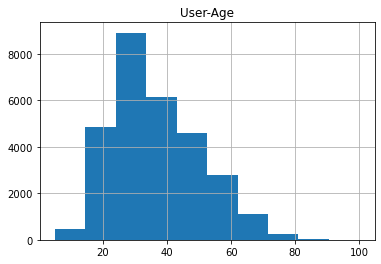

In [35]:
users_mean[(users_mean['User-Age'] >= 5) & (users['User-Age'] <= 100)].hist(column = 'User-Age')

<Axes: >

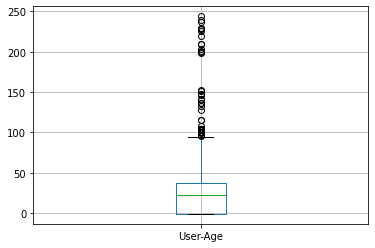

In [36]:
users_mean.boxplot(column = 'User-Age')

<Axes: >

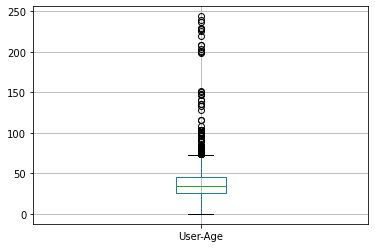

In [37]:
users_mean[users_mean['User-Age'] != -1].boxplot(column = 'User-Age')

In [38]:
mean_age_by_country = users_valid.groupby('User-Country')['User-Age'].mean(). \
    reset_index().set_index('User-Country')['User-Age'].to_dict()

In [39]:
users_mean.loc[(users_mean['User-Age'] < 5) | (users_mean['User-Age'] > 100),'User-Age'] = \
users_mean.loc[(users_mean['User-Age'] < 5) | (users_mean['User-Age'] > 100), 'User-Country'].map(mean_age_by_country)

In [40]:
users_mean

,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,canada,35.389436
1,9,germantown,tennessee,usa,37.603801
2,16,albuquerque,new mexico,usa,37.603801
3,17,chesapeake,virginia,usa,37.603801
4,19,weston,unknown,unknown,14.000000
...,...,...,...,...,...
48294,278846,toronto,ontario,canada,23.000000
48295,278849,georgetown,ontario,canada,23.000000
48296,278851,dallas,texas,usa,33.000000
48297,278852,brisbane,queensland,australia,32.000000


<Axes: >

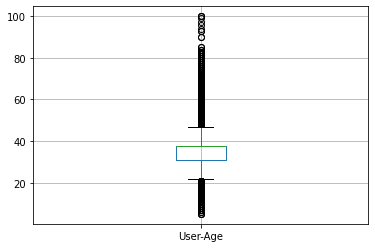

In [41]:
users_mean.boxplot(column = 'User-Age')

Text(0, 0.5, 'Frequency')

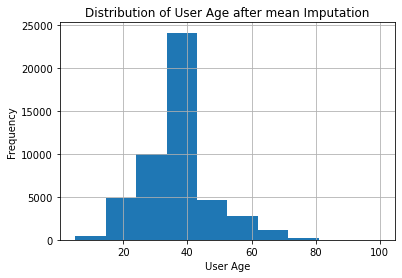

In [42]:
users_mean.hist(column = 'User-Age')
plt.title('Distribution of User Age after mean Imputation')
plt.xlabel('User Age')
plt.ylabel('Frequency')

#### Impute random sampling:

In [43]:
users_random = users.copy()

In [44]:
users_valid = users_random[(users_random['User-Age'] >= 5) & (users_mean['User-Age'] < 100)]

In [45]:
users_valid

,User-ID,User-City,User-State,User-Country,User-Age
4,19,weston,unknown,unknown,14.0
8,42,appleton,wisconsin,usa,17.0
9,44,black mountain,north carolina,usa,51.0
10,51,renton,washington,usa,34.0
12,56,cheyenne,wyoming,usa,24.0
...,...,...,...,...,...
48293,278844,st. paul,minnesota,usa,28.0
48294,278846,toronto,ontario,canada,23.0
48295,278849,georgetown,ontario,canada,23.0
48296,278851,dallas,texas,usa,33.0


In [46]:
users_random.loc[(users_random['User-Age'] < 5) | (users_random['User-Age'] > 100), 'User-Age'] = np.nan

In [47]:
# Function to impute missing ages within each country
def impute_missing_ages(df):
    # Group DataFrame by user-country
    grouped = df.groupby('User-Country')
    
    # Iterate over each country group
    for country, group in grouped:
        # Extract non-missing ages within the current country group
        observed_ages = group['User-Age'].dropna().values
        
        # Count number of missing ages in the current country group
        num_missing = group['User-Age'].isnull().sum()
        # Impute missing ages by randomly sampling observed ages within the country
        if num_missing > 0 and observed_ages.shape[0] > 0:
            imputed_ages = np.random.choice(observed_ages, size=num_missing, replace=True)
            df.loc[group[group['User-Age'].isnull()].index, 'User-Age'] = imputed_ages
    
    return df

users_random_imputed = impute_missing_ages(users_random)

In [48]:
users_random_imputed[users_random_imputed['User-Age'].isna()]['User-Country'].unique()

array(['alderney', 'latvia', 'csa', 'guatemala', 'u.s. of a.', 'tdzimi',
       'palau', 'antarctica', 'c', 'ferrara', 'morgan', 'lkjlj', 'ua',
       'richmond country', 'zimbabwe', 'framingham', 'united kindgonm',
       'st. helena', 'scotland', 'aroostook', 'worcester', 'burma',
       'van wert', 'u.s>', 'k1c7b1', 'rutherford', 'kazakhstan', 'camden',
       'laos', 'u.s.a>', 'albania', 'u.a.e', 'petrolwar nation', 'us',
       'shelby', 'turkmenistan', 'caribbean sea', 'cananda', 'benin',
       'cameroon', 'republic of panama', 'guinea', 'niger',
       'united states of america', 'los estados unidos de norte america',
       'orange co', 'estonia', 'nz', 'l`italia', 'bolivia', 'kern',
       'st.thomasi', 'ukraine', 'united staes', 'ghana'], dtype=object)

In [49]:
# drop 60 that can't be traced for now
users_random_imputed.isna().sum()

User-ID          0
User-City        0
User-State       0
User-Country     0
User-Age        60
dtype: int64

Text(0, 0.5, 'Frequency')

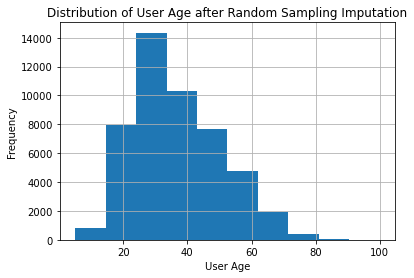

In [50]:
users_random_imputed.hist('User-Age')
plt.title('Distribution of User Age after Random Sampling Imputation')
plt.xlabel('User Age')
plt.ylabel('Frequency')

In [51]:
users[(users['User-Age'] >= 5) & (users['User-Age'] <= 100)]

,User-ID,User-City,User-State,User-Country,User-Age
4,19,weston,unknown,unknown,14.0
8,42,appleton,wisconsin,usa,17.0
9,44,black mountain,north carolina,usa,51.0
10,51,renton,washington,usa,34.0
12,56,cheyenne,wyoming,usa,24.0
...,...,...,...,...,...
48293,278844,st. paul,minnesota,usa,28.0
48294,278846,toronto,ontario,canada,23.0
48295,278849,georgetown,ontario,canada,23.0
48296,278851,dallas,texas,usa,33.0


<Axes: >

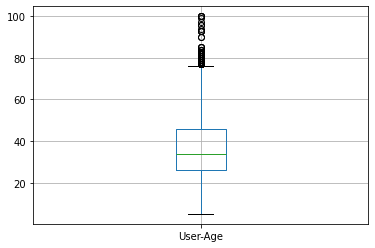

In [52]:
users_random_imputed.boxplot(column = 'User-Age')

<Axes: >

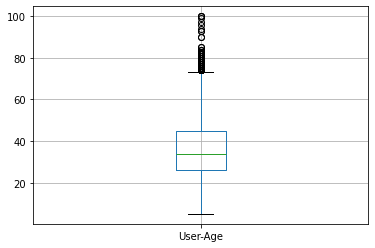

In [53]:
users[(users['User-Age'] >= 5) & (users['User-Age'] <= 100)].boxplot(column = 'User-Age')

### Discretize user age:
#### Uniformly:

In [54]:
users = users_random_imputed.dropna()
users.count()

User-ID         48239
User-City       48239
User-State      48239
User-Country    48239
User-Age        48239
dtype: int64

In [55]:
from sklearn.preprocessing import KBinsDiscretizer

In [56]:
encoder = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

In [57]:
age_discretized = encoder.fit_transform(users[['User-Age']])

In [58]:
encoder.bin_edges_

array([array([  5.  ,  28.75,  52.5 ,  76.25, 100.  ])], dtype=object)

In [59]:
users['Age-Group'] = age_discretized.astype(int)

/var/folders/z5/2xfh619x3csdbh0bph8vb9100000gn/T/ipykernel_6491/3486801662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Age-Group'] = age_discretized.astype(int)


In [60]:
users

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group
0,8,timmins,ontario,canada,24.0,0
1,9,germantown,tennessee,usa,52.0,1
2,16,albuquerque,new mexico,usa,53.0,2
3,17,chesapeake,virginia,usa,20.0,0
4,19,weston,unknown,unknown,14.0,0
...,...,...,...,...,...,...
48294,278846,toronto,ontario,canada,23.0,0
48295,278849,georgetown,ontario,canada,23.0,0
48296,278851,dallas,texas,usa,33.0,1
48297,278852,brisbane,queensland,australia,32.0,1


array([[<Axes: title={'center': 'Age-Group'}>]], dtype=object)

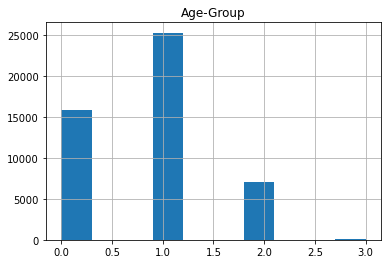

In [61]:
users.hist('Age-Group')

#### Quantiles:

In [62]:
encoder = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [63]:
age_discretized = encoder.fit_transform(users[['User-Age']])

In [64]:
encoder.bin_edges_

array([array([  5.,  26.,  34.,  46., 100.])], dtype=object)

In [65]:
users['Age-Group'] = age_discretized.astype(int)

/var/folders/z5/2xfh619x3csdbh0bph8vb9100000gn/T/ipykernel_6491/3486801662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Age-Group'] = age_discretized.astype(int)


In [66]:
users

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group
0,8,timmins,ontario,canada,24.0,0
1,9,germantown,tennessee,usa,52.0,3
2,16,albuquerque,new mexico,usa,53.0,3
3,17,chesapeake,virginia,usa,20.0,0
4,19,weston,unknown,unknown,14.0,0
...,...,...,...,...,...,...
48294,278846,toronto,ontario,canada,23.0,0
48295,278849,georgetown,ontario,canada,23.0,0
48296,278851,dallas,texas,usa,33.0,1
48297,278852,brisbane,queensland,australia,32.0,1


array([[<Axes: title={'center': 'Age-Group'}>]], dtype=object)

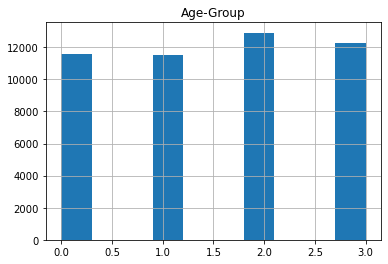

In [67]:
users.hist('Age-Group')

#### K means:

In [68]:
encoder = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')

In [69]:
age_discretized = encoder.fit_transform(users[['User-Age']])

In [70]:
encoder.bin_edges_

array([array([  5.        ,  40.15727315, 100.        ])], dtype=object)

In [71]:
users['Age-Group'] = age_discretized.astype(int)

/var/folders/z5/2xfh619x3csdbh0bph8vb9100000gn/T/ipykernel_6491/3486801662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Age-Group'] = age_discretized.astype(int)


In [72]:
from sklearn.cluster import KMeans

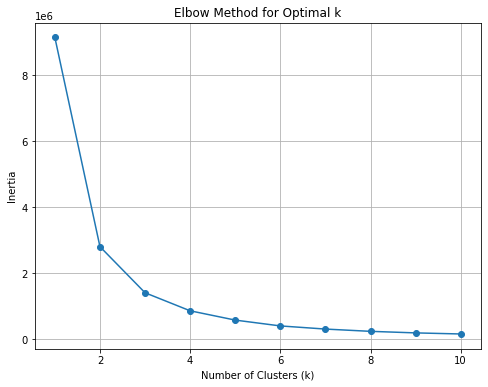

In [73]:
inertia_values = []
max_clusters = 10

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(users[['User-Age']])
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

array([[<Axes: title={'center': 'Age-Group'}>]], dtype=object)

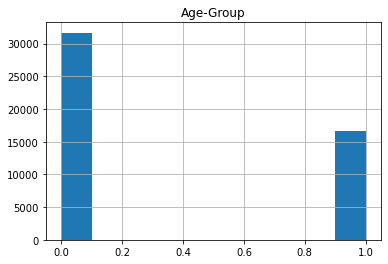

In [74]:
users.hist('Age-Group')

## Discretize by percentiles

In [75]:
users_list = np.array(users['User-Age'])
min = users['User-Age'].min() - 1
p25 = np.percentile(users_list, 25)
p50 = np.percentile(users_list, 50)
p75 = np.percentile(users_list, 75)
p100 = np.percentile(users_list, 100)

In [76]:
# (4, 24] - young reader
# (24, 35] - young to middle aged reader
# (35, 50] -  middle aged reader
# (50, 100] - older reader
bins = [min, p25, p50, p75, p100]

users_binned = users.copy()

In [77]:
bins

[4.0, 26.0, 34.0, 46.0, 100.0]

In [78]:
users_binned['Age-Group'] = pd.cut(x=users['User-Age'], bins=bins)

In [79]:
users_binned

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group
0,8,timmins,ontario,canada,24.0,"(4.0, 26.0]"
1,9,germantown,tennessee,usa,52.0,"(46.0, 100.0]"
2,16,albuquerque,new mexico,usa,53.0,"(46.0, 100.0]"
3,17,chesapeake,virginia,usa,20.0,"(4.0, 26.0]"
4,19,weston,unknown,unknown,14.0,"(4.0, 26.0]"
...,...,...,...,...,...,...
48294,278846,toronto,ontario,canada,23.0,"(4.0, 26.0]"
48295,278849,georgetown,ontario,canada,23.0,"(4.0, 26.0]"
48296,278851,dallas,texas,usa,33.0,"(26.0, 34.0]"
48297,278852,brisbane,queensland,australia,32.0,"(26.0, 34.0]"


In [80]:
reading_groups = users_binned.groupby('Age-Group')['User-ID'].count().reset_index()
reading_groups

/var/folders/z5/2xfh619x3csdbh0bph8vb9100000gn/T/ipykernel_6491/1083122223.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reading_groups = users_binned.groupby('Age-Group')['User-ID'].count().reset_index()


,Age-Group,User-ID
0,"(4.0, 26.0]",13004
1,"(26.0, 34.0]",11557
2,"(34.0, 46.0]",12226
3,"(46.0, 100.0]",11452


/Users/caseyhaseloff/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age-Group', ylabel='User-ID'>

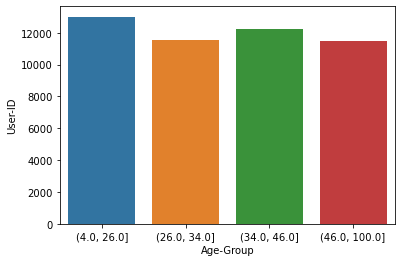

In [81]:
sns.barplot(reading_groups, x = 'Age-Group', y = 'User-ID')

### Encoding age group and user-country for decision tree:

In [82]:
users_binned.count()

User-ID         48239
User-City       48239
User-State      48239
User-Country    48239
User-Age        48239
Age-Group       48239
dtype: int64

In [83]:
users_binned.columns

Index(['User-ID', 'User-City', 'User-State', 'User-Country', 'User-Age',
       'Age-Group'],
      dtype='object')

In [84]:
columns = ['User-City', 'User-State', 'User-Country']

In [85]:
users_binned['User-Info'] = users_binned[columns].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [86]:
encoder = OrdinalEncoder()
encoded_country = encoder.fit_transform(users_binned[['User-Country']])
users_binned['User-Country-Encoded'] = encoded_country.astype(int)

In [87]:
encoder = OrdinalEncoder()
encoded_info = encoder.fit_transform(users_binned[['User-Info']])
users_binned['User-Info-Encoded'] = encoded_info.astype(int)

In [88]:
encoder = OrdinalEncoder()
encoded_age = encoder.fit_transform(users_binned[['Age-Group']])
users_binned['Age-Group-Encoded'] = encoded_age.astype(int)

In [89]:
users_binned

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group,User-Info,User-Country-Encoded,User-Info-Encoded,Age-Group-Encoded
0,8,timmins,ontario,canada,24.0,"(4.0, 26.0]",timmins_ontario_canada,17,11421,0
1,9,germantown,tennessee,usa,52.0,"(46.0, 100.0]",germantown_tennessee_usa,124,4225,3
2,16,albuquerque,new mexico,usa,53.0,"(46.0, 100.0]",albuquerque_new mexico_usa,124,190,3
3,17,chesapeake,virginia,usa,20.0,"(4.0, 26.0]",chesapeake_virginia_usa,124,2148,0
4,19,weston,unknown,unknown,14.0,"(4.0, 26.0]",weston_unknown_unknown,121,12473,0
...,...,...,...,...,...,...,...,...,...,...
48294,278846,toronto,ontario,canada,23.0,"(4.0, 26.0]",toronto_ontario_canada,17,11477,0
48295,278849,georgetown,ontario,canada,23.0,"(4.0, 26.0]",georgetown_ontario_canada,17,4211,0
48296,278851,dallas,texas,usa,33.0,"(26.0, 34.0]",dallas_texas_usa,124,2807,1
48297,278852,brisbane,queensland,australia,32.0,"(26.0, 34.0]",brisbane_queensland_australia,7,1450,1


In [90]:
users_binned.to_csv(path + 'cleaned/BX-Users.csv', index = False)